
>Arthur Resende Santos
12011bcc020

Modelagem e Simulação

Lista de exercícios práticos




## Exercício 1

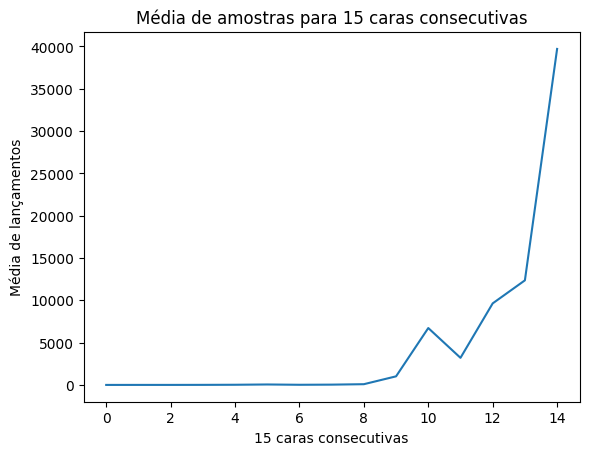

In [41]:
import numpy as np
import matplotlib.pyplot as plt

resultados = []

# 15 caras consecutivas
# dado que as chances sao de 50%
# vale o mesmo para lançamentos consecutivos de coroas
num_caras = 15
for i in range(num_caras):
    ns_consecutivos = 0
    amostras_feitas = 0
    while ns_consecutivos != i:
        amostra = np.random.choice(['H', 'T'])
        if amostra == 'H':
            ns_consecutivos += 1
        else:
            ns_consecutivos = 0
        amostras_feitas += 1
    resultados.append(np.mean([amostras_feitas for _ in range(10000)])) # num experimentos

plt.xlabel(f'{num_caras} caras consecutivas')
plt.ylabel('Média de lançamentos')
plt.title(f'Média de amostras para {num_caras} caras consecutivas')
plt.plot(resultados)
plt.show()

## Exercício 2

### Letra A

In [59]:

import numpy as np
import matplotlib.pyplot as plt

resultados = []
for _ in range(100):
  amostras = []
for j in range(10000):
  comum = np.random.choice(range(1, 21))
  vantagem = np.random.choice(range(1, 21), 2).max()
  amostras.append(comum < vantagem)

resultados.append(np.mean(amostras))
print(np.mean(resultados))

0.6385


### Letra B

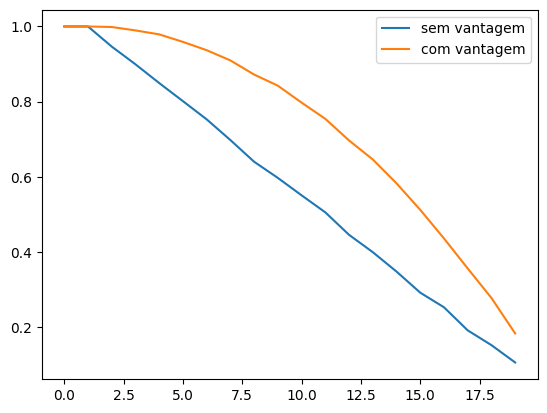

In [62]:
import numpy as np
import matplotlib.pyplot as plt

comum_percentagens = []
vantagem_percentagens = []

for d in range(20):
    amostras_comum = []
    amostras_vantagem = []

    for j in range(10000):
        comum = np.random.choice(range(1, 21))
        vantagem = np.random.choice(range(1, 21), 2).max()

        amostras_comum.append(comum >= d)
        amostras_vantagem.append(vantagem >= d)

    comum_percentagens.append(np.mean(amostras_comum))
    vantagem_percentagens.append(np.mean(amostras_vantagem))

plt.plot(comum_percentagens, label='sem vantagem')
plt.plot(vantagem_percentagens, label='com vantagem')
plt.legend()
plt.show()


### Letra C






A importância da habilidade "Vantagem" se altera de acordo com a defesa do monstro. Isso ocorre pois existem diferentes probabilidades para a chance de determinados valores saírem para dois dados. Os valores que fazem parte da mediana tendem a cair mais vezes, por isso a maior vantagem deste atributo por volta da defesa 10. Sem vantagem, por outro lado, se comporta de forma basicamente linear, pois nao sofre alterações de probabilidade referente à defesa.

## Exercício 3

In [66]:
import numpy as np
import matplotlib.pyplot as plt

resultados = []

for i in range(1, 10000):
    amostras = []
    for _ in range(3):
        jogadas = 1
        amostra = np.random.choice(['H', 'T'], i)

        while len(amostra) != 0:
            contagem_coroas = np.count_nonzero(amostra == 'T')
            amostra = np.random.choice(['H', 'T'], contagem_coroas)
            jogadas += 1

        amostras.append(jogadas)

    resultados.append(np.mean(amostras))

print(np.mean(resultados))

14.193119311931193


## Exercício 4

In [69]:
import numpy as np

opcoes = ['H', 'M']
resultados = []

for _ in range(10000):
    filho_a = np.random.choice(opcoes)
    filho_b = np.random.choice(opcoes)

    resultados.append([filho_a, filho_b])

total_com_pelo_menos_um_H = ['H' in result for result in resultados].count(True)
total_com_ambos_H = [result == ['H', 'H'] for result in resultados].count(True)

print(total_com_ambos_H / total_com_pelo_menos_um_H)


0.34232916777452804


## Exercício 5

### Letra A

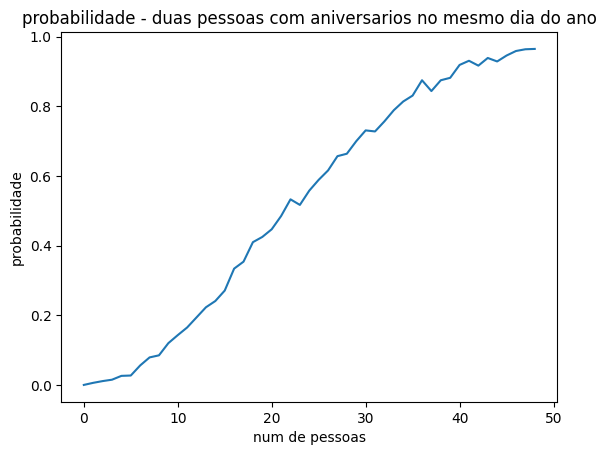

In [96]:
import numpy as np
import matplotlib.pyplot as plt

resultados = []

for i in range(1, 50):
    contador = 0
    for _ in range(1000):
        niversarios = np.array([0] * 365)
        for _ in range(i):
            niver = np.random.randint(365)
            if niversarios[niver] == 1:
                contador += 1
                break
            niversarios[niver] = 1
    resultados.append(contador / 1000)

plt.xlabel('num de pessoas')
plt.ylabel('probabilidade')
plt.title('probabilidade - duas pessoas com aniversarios no mesmo dia do ano')
plt.plot(resultados)
plt.show()

### Letra B

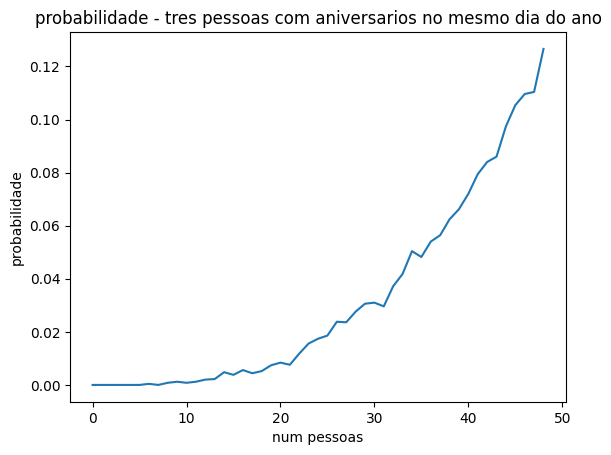

In [95]:
import numpy as np
import matplotlib.pyplot as plt

resultados = []

for i in range(1, 50):
    experimento_resultados = []
    for _ in range(5):
        niversarios = np.array([0] * 365)
        for _ in range(1000):
            niversarios = np.array([0] * 365)
            for _ in range(i):
                niver = np.random.randint(365)
                niversarios[niver] += 1
            if np.any(niversarios >= 3):
                experimento_resultados.append(True)
            else:
                experimento_resultados.append(False)
    resultados.append(np.mean(experimento_resultados))

plt.xlabel('num pessoas')
plt.ylabel('probabilidade')
plt.title('probabilidade - tres pessoas com aniversarios no mesmo dia do ano')
plt.plot(resultados)
plt.show()

## Exercício 6

### Letra A

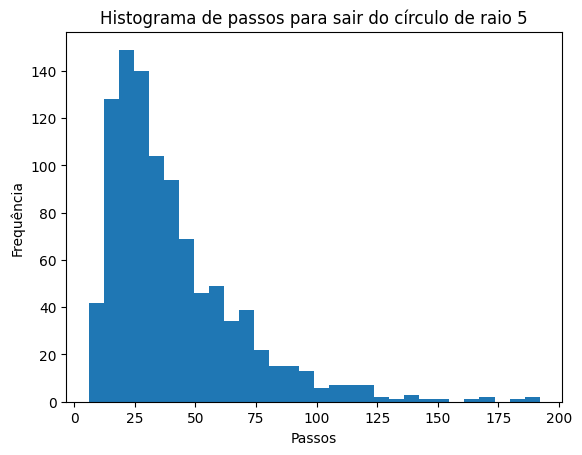

In [85]:
import numpy as np
import matplotlib.pyplot as plt

resultados = []

for _ in range(1000):
    coord_bebado = [0, 0]
    passos = 0
    while np.linalg.norm(coord_bebado) <= 5:
        x = np.random.uniform(-1, 1)
        y = np.random.uniform(-1, 1)
        coord_bebado[0] += x
        coord_bebado[1] += y
        passos += 1
    resultados.append(passos)

plt.xlabel('passos')
plt.ylabel('frequencia')
plt.title('passos para afastar cinco metros do poste')
plt.hist(resultados, bins=30)
plt.show()

### Letra B

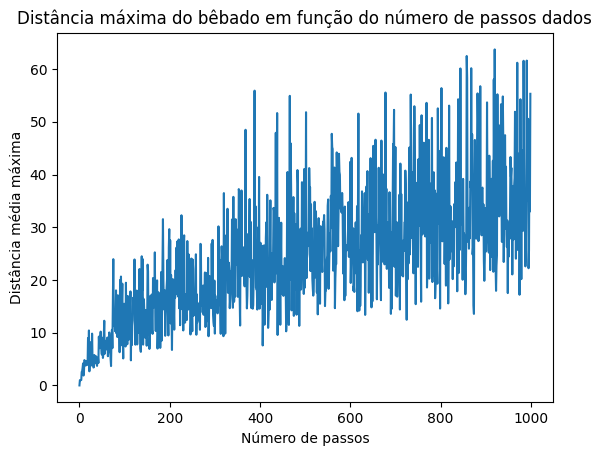

In [86]:
import numpy as np
import matplotlib.pyplot as plt

resultados = []

for i in range(1000):
    distancia_maxima = 0
    coord_bebado = [0, 0]

    for _ in range(i):
        x = np.random.random() * 2 - 1
        y = np.sqrt(1 - x**2)
        y = np.random.choice([y, -y])

        deslocamento = [x, y]
        coord_bebado[0] += deslocamento[0]
        coord_bebado[1] += deslocamento[1]

        distancia_maxima = max(distancia_maxima, np.linalg.norm(coord_bebado))

    resultados.append(distancia_maxima)

plt.xlabel('passos')
plt.ylabel('media da distancia')
plt.title('distancia media x passos')
plt.plot(resultados)
plt.show()

## Exercício 7

### Letra A

In [87]:
import numpy as np

# define a matriz de adjacencia representando o grafo dos paises da america do sul
matriz_adjacencia = [
    [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # brasil eh adjacente a argentina e uruguai
    [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # argentina eh adjacente ao brasil e chile
    [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],  # uruguai eh adjacente ao brasil e paraguai
    [0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],  # chile eh adjacente a argentina, peru e bolivia
    [0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],  # paraguai eh adjacente ao uruguai, chile e bolivia
    [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0],  # peru eh adjacente ao chile e Equador
    [0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0],  # bolivia eh adjacente ao chile, paraguai e Peru
    [0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0],  # equador eh adjacente ao peru, colombia e venezuela
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0],  # colombia eh adjacente ao equador e brasil
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0],  # venezuela eh adjacente ao equador e guiana
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],  # guiana eh adjacente a venezuela e suriname
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0],  # suriname eh adjacente a guiana e guiana francesa
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],  # guiana francesa eh adjacente ao suriname e brasil
]

# pais inicial - brasil
pais_atual = 0

num_passos = 1000000

# visitas ao brasil
num_brasil = 0

for _ in range(num_passos):
    proximo_pais = np.random.choice([i for i, adjacente in enumerate(matriz_adjacencia[pais_atual]) if adjacente])
    pais_atual = proximo_pais
    if pais_atual == 0:
        num_brasil += 1

probabilidade_brasil = num_brasil / num_passos
print(f"probabilidade de estar no Brasil apos {num_passos} passos eh: {probabilidade_brasil}")

A probabilidade de estar no Brasil após 1000000 passos é: 0.066548


### Letra B

In [92]:
# define a matriz de adjacencia representando o grafo dos paises da america do sul
matriz_adjacencia = [
    [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # brasil eh adjacente a argentina e uruguai
    [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # argentina eh adjacente ao brasil e chile
    [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],  # uruguai eh adjacente ao brasil e paraguai
    [0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],  # chile eh adjacente a argentina, peru e bolivia
    [0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],  # paraguai eh adjacente ao uruguai, chile e bolivia
    [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0],  # peru eh adjacente ao chile e Equador
    [0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0],  # bolivia eh adjacente ao chile, paraguai e Peru
    [0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0],  # equador eh adjacente ao peru, colombia e venezuela
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0],  # colombia eh adjacente ao equador e brasil
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0],  # venezuela eh adjacente ao equador e guiana
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],  # guiana eh adjacente a venezuela e suriname
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0],  # suriname eh adjacente a guiana e guiana francesa
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],  # guiana francesa eh adjacente ao suriname e brasil
]

total_passos = 0

num_experimentos = 5000

for _ in range(num_experimentos):
    passos = 0
    visitados = [False] * 13
    posicao_pais = np.random.randint(0, 13)
    visitados[posicao_pais] = True

    while not all(visitados):
        proximo_pais = np.random.choice(range(13), p=[p / sum(matriz_adjacencia[posicao_pais]) for p in matriz_adjacencia[posicao_pais]])
        visitados[proximo_pais] = True
        posicao_pais = proximo_pais
        passos += 1

    total_passos += passos

media_passos = total_passos / num_experimentos

print(media_passos)

124.7856


### Letra C

In [112]:
# define a matriz de adjacencia representando o grafo dos paises da america do sul
matriz_adjacencia = [
    [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # brasil eh adjacente a argentina e uruguai
    [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # argentina eh adjacente ao brasil e chile
    [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],  # uruguai eh adjacente ao brasil e paraguai
    [0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],  # chile eh adjacente a argentina, peru e bolivia
    [0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],  # paraguai eh adjacente ao uruguai, chile e bolivia
    [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0],  # peru eh adjacente ao chile e Equador
    [0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0],  # bolivia eh adjacente ao chile, paraguai e Peru
    [0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0],  # equador eh adjacente ao peru, colombia e venezuela
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0],  # colombia eh adjacente ao equador e brasil
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0],  # venezuela eh adjacente ao equador e guiana
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],  # guiana eh adjacente a venezuela e suriname
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0],  # suriname eh adjacente a guiana e guiana francesa
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],  # guiana francesa eh adjacente ao suriname e brasil
]

num_experimentos = 10000
probabilidade_total_2 = 0

for _ in range(num_experimentos):
    pais_atual = 0
    num_vezes_no_brasil = 0

    for _ in range(2):
        proximo_pais = np.random.choice([i for i, adjacente in enumerate(matriz_adjacencia[pais_atual]) if adjacente])
        pais_atual = proximo_pais
        if pais_atual == 0:
            num_vezes_no_brasil += 1

    probabilidade_no_brasil = num_vezes_no_brasil / 2
    probabilidade_total_2 += probabilidade_no_brasil

probabilidade_media_2 = probabilidade_total_2 / num_experimentos
print(f"probabilidade de estar no Brasil apos 2 passos em {num_experimentos} experimentos eh: {probabilidade_media_2}")

probabilidade_total_3 = 0

for _ in range(num_experimentos):
    pais_atual = 0
    num_vezes_no_brasil = 0

    for _ in range(3):
        proximo_pais = np.random.choice([i for i, adjacente in enumerate(matriz_adjacencia[pais_atual]) if adjacente])
        pais_atual = proximo_pais
        if pais_atual == 0:
            num_vezes_no_brasil += 1

    probabilidade_no_brasil = num_vezes_no_brasil / 3
    probabilidade_total_3 += probabilidade_no_brasil

probabilidade_media_3 = probabilidade_total_3 / num_experimentos
print(f"probabilidade de estar no Brasil apos 3 passos em {num_experimentos} experimentos eh: {probabilidade_media_3}")

probabilidade_total_4 = 0

for _ in range(num_experimentos):
    pais_atual = 0
    num_vezes_no_brasil = 0

    for _ in range(4):
        proximo_pais = np.random.choice([i for i, adjacente in enumerate(matriz_adjacencia[pais_atual]) if adjacente])
        pais_atual = proximo_pais
        if pais_atual == 0:
            num_vezes_no_brasil += 1

    probabilidade_no_brasil = num_vezes_no_brasil / 4
    probabilidade_total_4 += probabilidade_no_brasil

probabilidade_media_4 = probabilidade_total_4 / num_experimentos
print(f"probabilidade de estar no Brasil apos 4 passos em {num_experimentos} experimentos eh: {probabilidade_media_4}")

probabilidade de estar no Brasil apos 2 passos em 10000 experimentos eh: 0.253
probabilidade de estar no Brasil apos 3 passos em 10000 experimentos eh: 0.16673333333332335
probabilidade de estar no Brasil apos 4 passos em 10000 experimentos eh: 0.207


### Letra D

In [117]:
# define a matriz de adjacencia representando o grafo dos paises da america do sul
matriz_adjacencia = [
    [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # brasil eh adjacente a argentina e uruguai
    [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # argentina eh adjacente ao brasil e chile
    [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],  # uruguai eh adjacente ao brasil e paraguai
    [0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],  # chile eh adjacente a argentina, peru e bolivia
    [0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],  # paraguai eh adjacente ao uruguai, chile e bolivia
    [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0],  # peru eh adjacente ao chile e Equador
    [0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0],  # bolivia eh adjacente ao chile, paraguai e Peru
    [0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0],  # equador eh adjacente ao peru, colombia e venezuela
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0],  # colombia eh adjacente ao equador e brasil
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0],  # venezuela eh adjacente ao equador e guiana
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],  # guiana eh adjacente a venezuela e suriname
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0],  # suriname eh adjacente a guiana e guiana francesa
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],  # guiana francesa eh adjacente ao suriname e brasil
]

num_experimentos = 100000

nao_visitou_chile_10_passos = 0


for _ in range(num_experimentos):
    pais_atual = 0  # Começa no Brasil
    visitou_chile = False
    for _ in range(10):
        proximo_pais = np.random.choice([i for i, adjacente in enumerate(matriz_adjacencia[pais_atual]) if adjacente])
        if proximo_pais == 3:
            visitou_chile = True
            break
        pais_atual = proximo_pais

    if not visitou_chile:
        nao_visitou_chile_10_passos += 1

probabilidade_nao_visitar_chile_10_passos = nao_visitou_chile_10_passos / num_experimentos

print(f"probabilidade de nao visitar o chile em 10 passos eh: {probabilidade_nao_visitar_chile_10_passos}")


probabilidade de nao visitar o chile em 10 passos eh: 0.23685


## Exercício 8

### Letra A

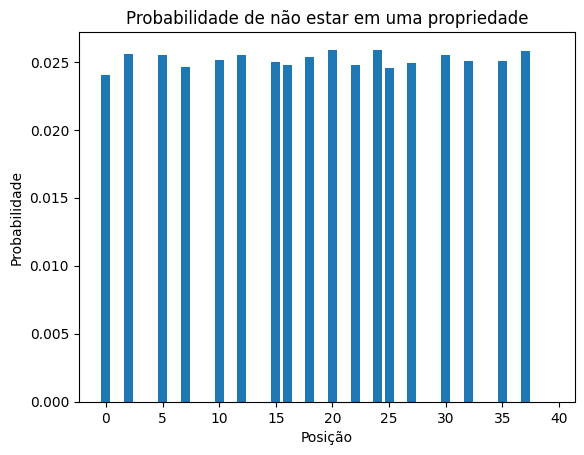

In [118]:
import numpy as np
import matplotlib.pyplot as plt

ehPropriedade = [
    0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
    0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
    0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
    0, 1, 0, 1, 1, 0, 1, 0, 1, 1
]

visitado = [0 for _ in range(len(ehPropriedade))]
posicao = 0
visitado[posicao] += 1

for _ in range(100000):
    resultadoDados = np.random.randint(1, 7) + np.random.randint(1, 7)
    posicao += resultadoDados
    posicao %= len(ehPropriedade)
    visitado[posicao] += 1


probabilidadeVisita = np.array(visitado) / np.sum(visitado)


for i in range(len(ehPropriedade)):
    if ehPropriedade[i]:
        probabilidadeVisita[i] = 0

plt.axes().set(xlabel='posicao', ylabel='probabilidade', title='probabilidade de nao estar em uma propriedade')
plt.bar(range(len(ehPropriedade)), probabilidadeVisita)
plt.show()

### Letra B

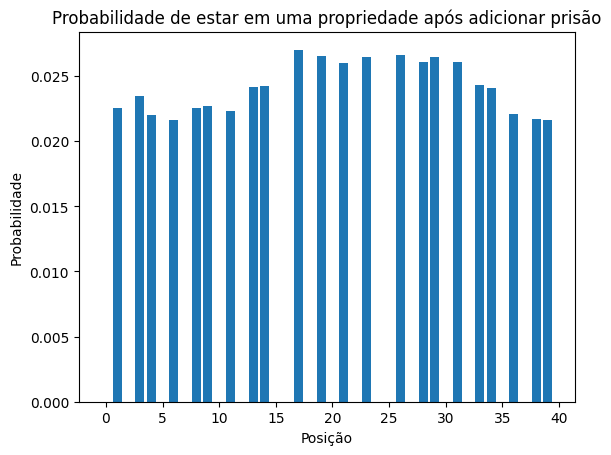

In [119]:
import numpy as np
import matplotlib.pyplot as plt

ehPropriedade = [
    0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
    0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
    0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
    0, 1, 0, 1, 1, 0, 1, 0, 1, 1
]

visitado = [0 for _ in range(len(ehPropriedade))]

posicao = 0
visitado[posicao] += 1

for _ in range(100000):
    resultadoDados = np.random.randint(1, 7) + np.random.randint(1, 7)
    posicao += resultadoDados
    posicao %= len(ehPropriedade)
    visitado[posicao] += 1

    if posicao == 30:
        posicao = 10
        visitado[posicao] += 1

probabilidadeVisita = np.array(visitado) / np.sum(visitado)

for i in range(len(ehPropriedade)):
    if ehPropriedade[i] == 0:
        probabilidadeVisita[i] = 0

plt.axes().set(xlabel='Posição', ylabel='Probabilidade', title='Probabilidade de estar em uma propriedade após adicionar prisão')
plt.bar(range(len(ehPropriedade)), probabilidadeVisita)
plt.show()

### Letra C

In [136]:
ehPropriedade = [
    0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
    0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
    0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
    0, 1, 0, 1, 1, 0, 1, 0, 1, 1]

visitas = [0 for _ in range(np.shape(ehPropriedade)[0])]
posicao = 0
visitas[posicao] += 1

for _ in range(100000):
    resultadoDados = np.random.randint(0, 7) + np.random.randint(0, 7)
    posicao += resultadoDados
    posicao %= np.shape(ehPropriedade)[0]

    visitas[posicao] += 1

    if posicao == 30:
      posicao = 10
      visitas[posicao] += 1

visitas = visitas / np.sum(visitas)
for i in range(np.shape(ehPropriedade)[0]):
    if ehPropriedade[i] == 0:
        visitas[i] = 0

visitas = np.array(visitas)

cores = {
  'roxo claro': np.mean(np.take(visitas, [1, 3, 4])),
  'azul claro': np.mean(np.take(visitas, [6, 8, 9])),
  'roxo escuro': np.mean(np.take(visitas, [11, 13, 14])),
  'laranja': np.mean(np.take(visitas, [17, 19])),
  'vermelho': np.mean(np.take(visitas, [21, 23])),
  'amarelo': np.mean(np.take(visitas, [26, 28, 29])),
  'verde': np.mean(np.take(visitas, [31, 33, 34, 36])),
  'azul': np.mean(np.take(visitas, [38, 39]))
}


print(cores)
print("A melhor cor é:", max(cores, key=cores.get))

{'roxo claro': 0.022189959303250868, 'azul claro': 0.0226414236391923, 'roxo escuro': 0.024125734441532123, 'laranja': 0.02673708211129408, 'vermelho': 0.025865008915608646, 'amarelo': 0.026759817725334294, 'verde': 0.023982012881349327, 'azul': 0.021704391546249112}
A melhor cor é: amarelo


Considerando que as frequências são consideravelmente próximas, não há tanta vantagem sobressalente entre as cores "Amarelo, Vermelho e Laranja". Mas as melhores escolhas são estas cores.

## Exercício 9

### Letra A

In [140]:
import math

lambda_v = 2
lambda_a = 3

prob_vermelho_vencer = 0.0
for k in range(lambda_a + 1):
    prob_vermelho_vencer += (lambda_v ** k) * math.exp(-lambda_v) / math.factorial(k)

print("probabilidade do time vermelho ganhar eh:", prob_vermelho_vencer)

probabilidade do time vermelho ganhar eh: 0.8571234604985472


### Letra B

In [141]:
lambda_r = 100
lambda_b = 150

prob_red_cats = lambda_r / (lambda_r + lambda_b)

print("probabilidade de vitoria :", prob_red_cats)

prob de vitorias : 0.4
